Introduction
In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

Note: We will briefly discuss this homework assignment on Thursday in class.

Data
For this assignment we will use two databases:

The Sean Lahman's Baseball Database which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please read the documentation."

Gapminder is a great resource that contains over 500 data sets related to world indicators such as income, GDP and life expectancy.

Purpose
In this assignment, you will learn how to:

a. Load in CSV files from the web.

b. Create functions in python.

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots.

Useful libraries for this assignment
numpy, for arrays
pandas, for data frames
matplotlib, for plotting

In [199]:
#import necessary libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Problem 1
In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared.

Problem 1(a)
Load in these CSV files from the Sean Lahman's Baseball Database. For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas DataFrame and show the head of each table.

Hint Use the requests, StringIO and zipfile modules to get from the web.

In [148]:
salaries_table = pd.read_csv("C:\\Users\\Dell\\Documents\\data_tutorials\\baseball\\Salaries.csv")
teams_table = pd.read_csv("C:\\Users\\Dell\\Documents\\data_tutorials\\baseball\\Teams.csv")

View the Salaries data

In [149]:
salaries_table.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


View the teams data

In [150]:
teams_table.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


Problem 1(b)
Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame.

In [151]:
sal_summary = salaries_table[["yearID", "teamID","salary"]].groupby(["yearID","teamID"], as_index = False)["salary"].sum()
sal_summary.head()
sal_summary.shape

(828, 3)

Problem 1(c)
Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

Hint: Merge the DataFrames using teamID and yearID.

In [152]:
#Now merge the two
wins_salary = pd.merge(sal_summary,
                      teams_table[["yearID","teamID","W"]],
                      on = ["yearID","teamID"])
wins_salary.head()
wins_salary.shape

(828, 4)

Problem 1(d)
How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end?

Hints: Use a for loop to consider multiple years. Use the teamID (three letter representation of the team name) to save space on the plot.

In [153]:
#one dual axis & one bubble plot
#lets arrange by years
data_by_years = wins_salary.groupby(["yearID"], as_index = False)
wins_salary.describe()

,yearID,salary,W
count,828.000000,8.280000e+02,828.000000
mean,1999.454106,5.394026e+07,79.833333
std,8.291344,3.868466e+07,12.011230
min,1985.000000,8.800000e+05,43.000000
25%,1992.000000,2.336596e+07,71.000000
50%,2000.000000,4.545050e+07,80.000000
75%,2007.000000,7.680033e+07,89.000000
max,2013.000000,2.319789e+08,116.000000


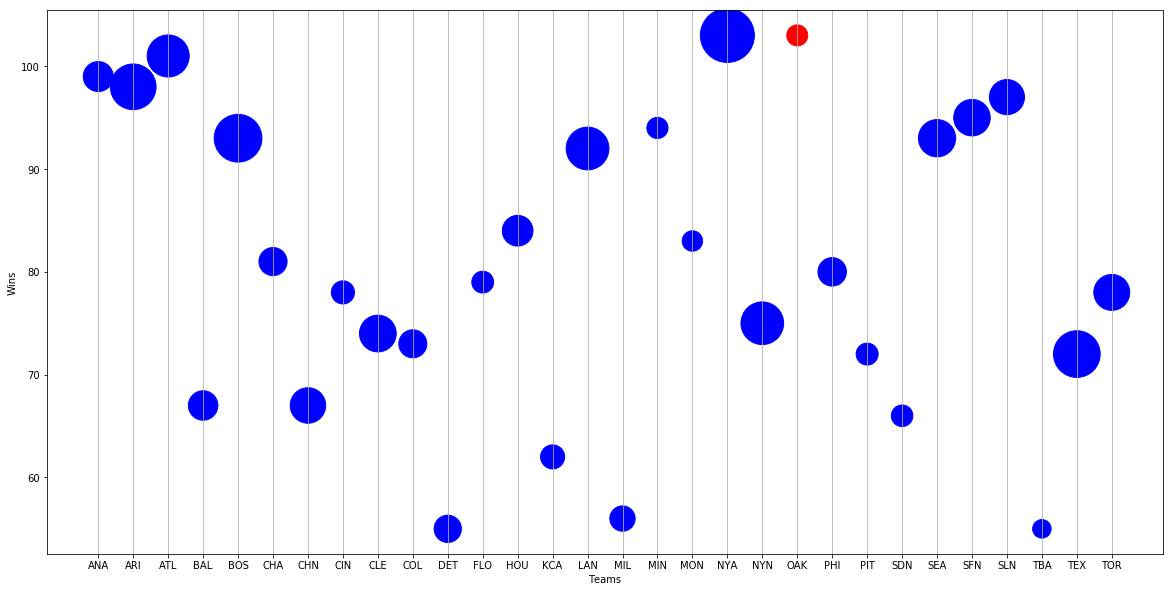

In [197]:
def plot_by_year(year):
    #extract data needed to plot
    #use dual axis plotting to rep data
    data = wins_salary[["teamID","salary","W"]][wins_salary["yearID"]==year]
    
    plt.rcParams["figure.figsize"] = [20, 10]
    #axes data
    teams = data["teamID"]
    x = data["W"]
    y = data["salary"]/1e6
    z = range(len(teams))
    
    
    #plot salaries against wins and set a diff color for OAK
    plt.scatter(z, x, s = y**1.65, color = ['red' if team == 'OAK' else 'blue' for team in teams])
    
    plt.xticks(z,teams)
    
    plt.xlabel('Teams')
    plt.ylabel('Wins')
    plt.show()
    plt.grid(which = "both", axis = "x")
    
    
#pick a year
year = 2002
years = wins_salary["yearID"].unique()
if year in years:
    plot_by_year(year)
else:
    print("There is no data for this year in our dataset")
    

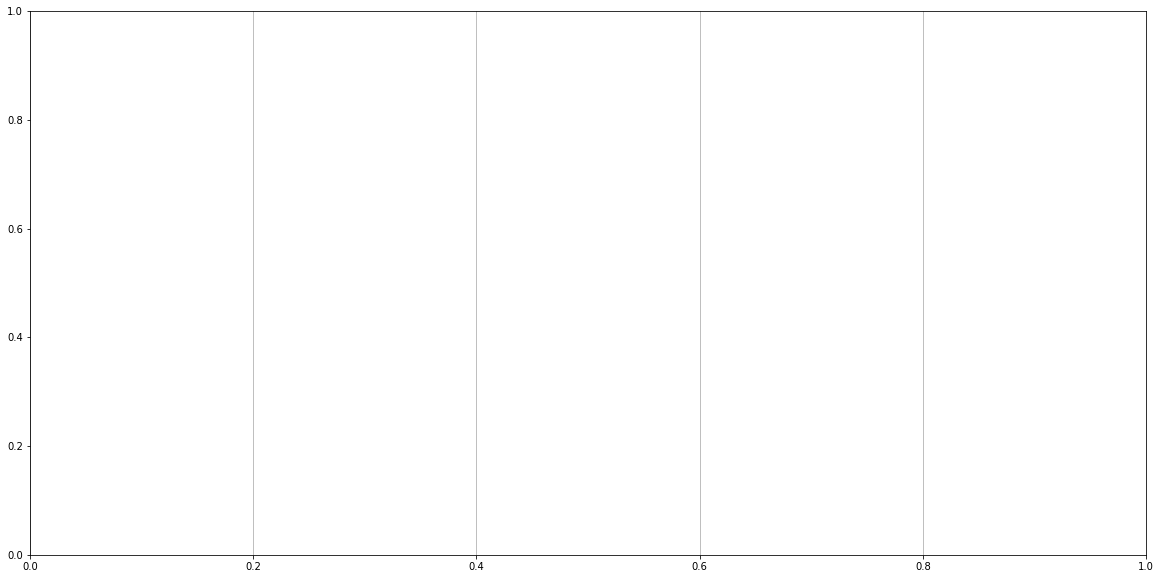

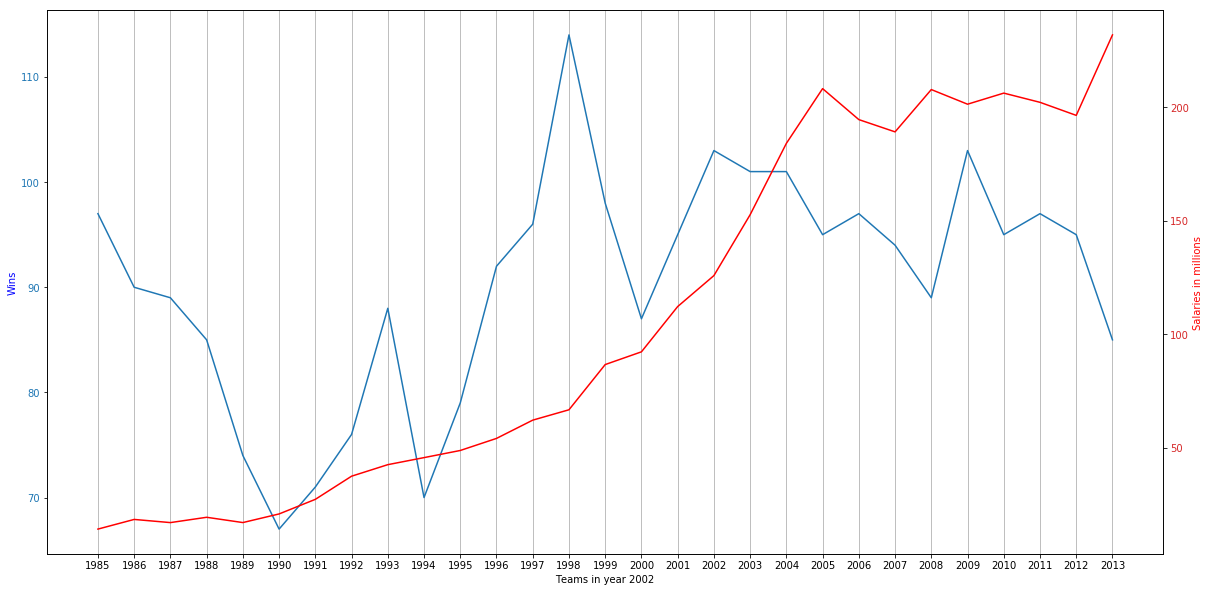

In [198]:
#by teams
def plot_by_team(team):
    #extract data needed to plot
    #use dual axis plotting to rep data
    data = wins_salary[["yearID","salary","W"]][wins_salary["teamID"]==team]
    
    
    plt.rcParams["figure.figsize"] = [20, 10]
    fig,ax1 = plt.subplots()
    
    
    #axes data
    
    x = data["W"]
    y = data["salary"]/1e6
    z = data["yearID"]
    
    #plot data
    ax1.plot(z,x)
    ax2 = ax1.twinx()
    ax2.plot(z,y,"r")
    
    
    ax1.tick_params(axis='y', labelcolor="tab:blue")
    ax2.tick_params(axis='y', labelcolor="tab:red")
    ax1.set_xlabel('Teams in year '+str(year))
    ax1.set_ylabel('Wins', color='b')
    ax2.set_ylabel('Salaries in millions', color='r')
    
    #plot salaries against wins and set a diff color for OAK
    #plt.plot(x, y) # color = ['red' if team == 'OAK' else 'blue' for team in teams])
    ax1.set_xticks(z)
    
    #ax.set_xticks
    #plt.xlabel('Wins')
    #plt.ylabel('Wins')
    
    ax1.grid(which = "both", axis = "x")
    plt.show()
    fig.tight_layout()
    #print(plt.rcParams["figure.figsize"])
    
    

    
#pick a team
team = "NYA"
teams = wins_salary["teamID"].unique()
if team in teams:
    plot_by_team(team)
else:
    print("This team was not found in dataset")

In [203]:
abcd = wins_salary[["yearID","salary","W"]][wins_salary["teamID"]==team]
#sns.pairplot(abcd)

In [204]:
abcd.corr()

,yearID,salary,W
yearID,1.000000,0.963615,0.457921
salary,0.963615,1.000000,0.473031
W,0.457921,0.473031,1.000000


For AC209 Students: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d).